# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import numpy as np
import torch
import torchvision
from tqdm import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
# You may add any imports you need
from IPython.display import clear_output

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_random_seed(10)

### Подготовка данных

In [ ]:
!wget -O dataset.zip https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip..
!unzip -qq dataset.zip -d dataset

--2021-11-21 14:55:45--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip..
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/33l8lp62rmvtx40/dataset.zip.. [following]
--2021-11-21 14:55:46--  https://www.dropbox.com/s/raw/33l8lp62rmvtx40/dataset.zip..
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc01424655d511b3a91c38dbe656.dl.dropboxusercontent.com/cd/0/inline/BaZDohA5CFqbu6WO_4uQsvgX2PV9M6SW1Gs8I-06OGk9_BUBanll1z62gVvpx8Cl0-ESYBPDGKt9l3E94WkX5xXXge2m_adfobmkWiVl90WCu-9tAHjgdt7y2SavL0qoxXmXwYoyB4u6VSDRmRYjYmhD/file# [following]
--2021-11-21 14:55:46--  https://uc01424655d511b3a91c38dbe656.dl.dropboxusercontent.com/cd/0/inline/BaZDohA5CFqbu6WO_4uQsvgX2PV9M6SW1Gs8I-06OGk9_BUBanll1z62gVvpx8Cl0-ESYBPDGKt9l3E94WkX5xX

In [ ]:
from torchvision.datasets import ImageFolder
import os
from torchvision import transforms
import PIL

train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)


base_path = './dataset/dataset/dataset'
train_dataset = ImageFolder(os.path.join(base_path, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(base_path, 'val'), transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

batch_size = 32

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [ ]:
train_subset = torch.utils.data.Subset(train_dataset, np.arange(0, len(train_dataset), 1000))
val_subset = torch.utils.data.Subset(val_dataset, np.arange(0, len(val_dataset), 100))

print('volume of train subset', len(train_subset))
print('volume of val subset', len(val_subset))

small_train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
small_val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=True)

volume of train subset 100
volume of val subset 100


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [ ]:
import sys

def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    
    model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])#.reshape((0, ))
    total_labels = np.array([])#.reshape((0, ))
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            # Move Batch to GPU
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            # Update weights
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # Update descirption for tqdm
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {"loss": total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics


def predict(model, val_dataloader, criterion, device="cuda:0"):

    losses, pred_classes, true_classes = torch.empty(0).to(device), torch.empty(0).to(device), torch.empty(0).to(device)

    model.eval()
    with torch.no_grad():
        for imgs, labels in tqdm(val_dataloader, desc=f"Validating", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            
            y_pred = model(imgs)
            loss = criterion(y_pred, labels)
            losses = torch.cat((losses, loss.unsqueeze(0)))
            pred_classes = torch.cat((pred_classes, torch.argmax(y_pred,dim=-1)))
            true_classes = torch.cat((true_classes, labels))

    return losses, pred_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):

    acc_log_train, acc_log_test = torch.empty(0).to(device), torch.empty(0).to(device)
    model.to(device)
    for epoch in range(n_epochs):

        epoch_acc = train_one_epoch(model, train_dataloader, criterion, optimizer, device)['accuracy']
        acc_log_train = torch.cat((acc_log_train,
                                    torch.tensor(epoch_acc).to(device).unsqueeze(0)))
        losses, pred, real = predict(model, val_dataloader, criterion, device)
        acc_log_test = torch.cat((acc_log_test, 
                                (torch.sum(pred == real) / len(real)).unsqueeze(0)))
        if scheduler:
            scheduler.step(sum(losses) / len(losses))
        
        clear_output()
        
        fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
        fig.suptitle(f'Accuracy throughout {epoch + 1} epochs')

        sns.lineplot(y=acc_log_train.cpu(), x=np.arange(len(acc_log_train)), ax=axes, label='train')
        sns.lineplot(y=acc_log_test.cpu(), x=np.arange(len(acc_log_train)), ax=axes, label='test')


        plt.show()

        print('Train accuracy', float(acc_log_train[-1]))
        print('Test accuracy', float(acc_log_test[-1]))

        
    return acc_log_train, acc_log_test

### Обучение модели, запуски экспериментов

In [ ]:
from torchvision.models import resnet18

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = resnet18(pretrained=False).to(device)
model.fc = nn.Linear(512, 200)
optimizer = torch.optim.Adam(model.parameters(), 1e-3)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.2, patience=2)
n_epochs = 10


Простой тест на проверку правильности написанного кода

In [1]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.cpu(), true_labels.cpu())
print("tests passed")

tests passed


Запустить обучение можно в ячейке ниже.

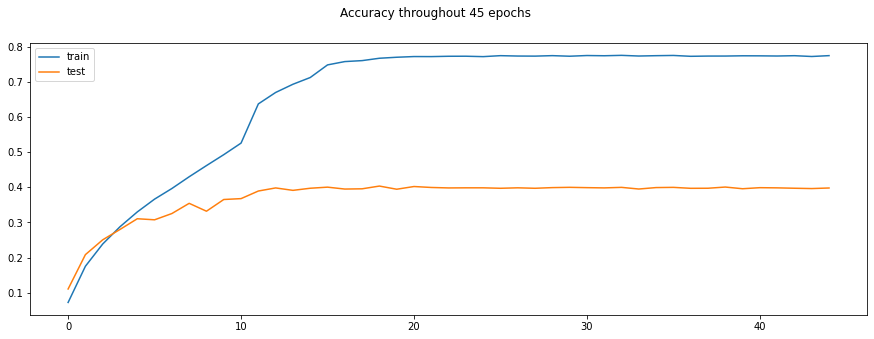

Train accuracy 0.77409
Test accuracy 0.3977999985218048


(tensor([0.0725, 0.1754, 0.2386, 0.2877, 0.3298, 0.3662, 0.3963, 0.4298, 0.4615,
         0.4926, 0.5254, 0.6369, 0.6694, 0.6927, 0.7119, 0.7477, 0.7572, 0.7599,
         0.7666, 0.7695, 0.7715, 0.7713, 0.7723, 0.7724, 0.7712, 0.7740, 0.7729,
         0.7727, 0.7741, 0.7724, 0.7744, 0.7738, 0.7749, 0.7730, 0.7740, 0.7746,
         0.7722, 0.7729, 0.7729, 0.7736, 0.7735, 0.7730, 0.7739, 0.7716, 0.7741],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1107, 0.2084, 0.2505, 0.2800, 0.3104, 0.3074, 0.3252, 0.3542, 0.3318,
         0.3651, 0.3676, 0.3892, 0.3980, 0.3911, 0.3971, 0.4002, 0.3948, 0.3955,
         0.4033, 0.3943, 0.4020, 0.3993, 0.3980, 0.3983, 0.3983, 0.3970, 0.3983,
         0.3970, 0.3989, 0.3997, 0.3988, 0.3981, 0.3996, 0.3949, 0.3990, 0.3996,
         0.3969, 0.3971, 0.4005, 0.3957, 0.3987, 0.3982, 0.3971, 0.3962, 0.3978],
        device='cuda:0'))

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler=scheduler, n_epochs=45)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.cpu(), predicted_labels.cpu())
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

Оценка за это задание составит 9.040909090909091 баллов


### Отчёт об экспериментах 

### Отчёт об экспериментах 

ой ну

изначально я начала с какой-то примитивной сетки с одним сверточным слоем, с одним линейным и с софтмаксом. она училась очень медленно и достаточно плохо, что ожидаемо. я даже думала, что у меня с кодом какие-то глобальные идейные проблемы, что обучения просто не происходит.

дальше я пробовала vgg блоки, они не дали ощутимого улучшения. 


потом кто-то в чатике посоветовал избавиться от софтмакса, что довольно логично, ведь нам не так интересно, насколько правильно модель формирует вероятностное пространство, сколько хочется, чтобы она просто давала правильные ответы. 

также примерно тогда же я созрела до того, чтобы наконец-то посмотреть в семинарах, как сделать аугментации. где-то с этого момента началось что-то интересное: модель начала что-то выучивать, но качество было в районе 20, что, конечно, несоизмеримо больше окрестности нуля, но все еще не очень. 

потом я взяла непредобученный резнет, модель начала обучаться сразу в несколько раз дольше, но зато стабильнее, качество начало переваливать за 30. как можно заметить по графику, с какого-то момента модель начинает намного лучше разбираться в трейне, чем в тесте. в этой связи я попробовала увеличить количество линейных слоев на выходе, добавить между ними дропаут. это оказалось неудачной идеей: модель обучалась миллион лет и смогла дать только около 22, причем в какой-то момент трейн опять начал значительно обгонять тест, хоть это и случилось позже. 

я вернулась к просто резнету: в конце концов, в сильном обгоне теста трейном нет ничего криминального, пока качество на тесте не начинает падать, а это не мой случай. также я заметила, что качество в этом случае в целом растет медленно, зато стабильно, в связи с чем я решила увеличить количество эпох с десяти. такое решение представилось мне опасным: будет горько потратить много часов на обучение, просто чтобы потом увидеть, что последние n из них модель просто портилась. поэтому я использовала шедулер. как можно заметить, он действительно не дал моей модели уронить качество после той эпохи, где обучающий потенциал был уже исчерпан. мы вышли на красивое плато, пробить которое, видимо, можно не длительностью обучения, а переподбором гиперпараметров.


обучение заняло 9991 секунд 

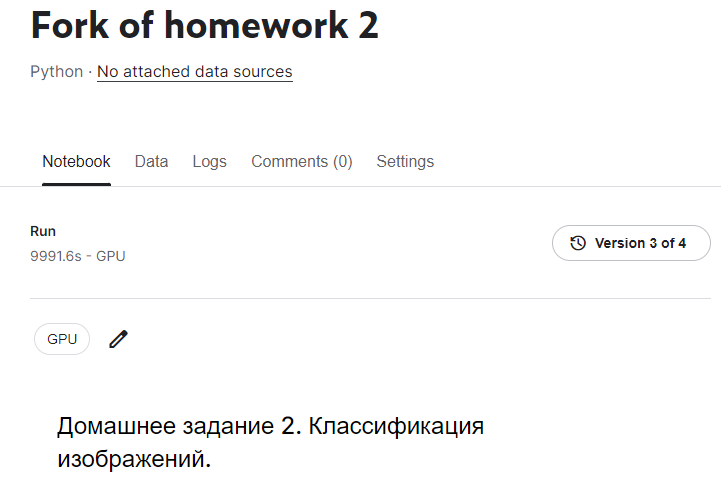

на что я опиралась при написании кода:     

семинары три и пять (некоторые функции прямо очень сильно ими вдохновлены)

https://www.kaggle.com/basu369victor/pytorch-tutorial-the-classification - туториал по торчу, хоть я в итоге впоследствии избавилась от всех стыренных оттуда идей, мое понимание они улучшили значительно

https://www.kaggle.com/isbhargav/guide-to-pytorch-learning-rate-scheduling - ознакомилась с шедьюлерами, их принципом работы

а еще а еще в чате писали что при логгировании результатов обучения можно зачесть лучший, даже если он не последний 

это может несильно поднять мою оценку:

In [3]:
max([0.1107, 0.2084, 0.2505, 0.2800, 0.3104, 0.3074, 0.3252, 0.3542, 0.3318,
         0.3651, 0.3676, 0.3892, 0.3980, 0.3911, 0.3971, 0.4002, 0.3948, 0.3955,
         0.4033, 0.3943, 0.4020, 0.3993, 0.3980, 0.3983, 0.3983, 0.3970, 0.3983,
         0.3970, 0.3989, 0.3997, 0.3988, 0.3981, 0.3996, 0.3949, 0.3990, 0.3996,
         0.3969, 0.3971, 0.4005, 0.3957, 0.3987, 0.3982, 0.3971, 0.3962, 0.3978]) / 0.44

0.9165909090909091